In [1]:
#####Capstone RMBS model Spring 2021 for Springboard Data Science Track #####

In [2]:
###Load required pacakages

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime
import warnings
import seaborn as sns

import scipy.stats as stats
import sklearn

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
#EDA data filepath downloaded and stored here
filename = 'C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/data_frame_for_EDA.csv'

In [5]:
load=pd.read_csv(filename, header =0, index_col=['Loan_Sequence_Number','Monthly_Reporting_Period'])

In [6]:
test_df =load

In [7]:
test_df['Modification_Flag'].replace(to_replace=np.nan,value='N', inplace=True)

In [8]:
test_df['Target_Performance_Variable'].replace(to_replace='Non-Default',value='Current', inplace=True)

In [9]:
test_df['Target_Performance_Variable'].replace(to_replace='Repurchase',value='Default', inplace=True)

In [10]:
test_df['previous_period'] = test_df['Target_Performance_Variable'].groupby('Loan_Sequence_Number').shift(1, axis=0)

In [11]:
test_df['previous_period'].replace(to_replace=np.nan,value='Current', inplace=True)

In [12]:
#test_df['previous_period'].replace(to_replace=0,value='Current', inplace=True)

In [13]:
test_df = test_df.reset_index()

In [14]:
test_df = test_df[test_df['Monthly_Reporting_Period']=='2004-01-01']

In [15]:
drop_cols =['Loan_Sequence_Number', 
            'Monthly_Reporting_Period', 
            'Current_Actual_UPB', 
            'Current_Loan_Delinquency_Status', 
            'Remaining_Months_to_Legal_Maturity',
            'Actual_Loss_Calculation', 
            'Zero_Balance_Code',
            'Zero_Balance_Removal_UPB',
            'Current_Deferred_UPB',
            'CS_HPA_20_cities', 'UNEMPLOY',
            'Y30_fixed_mortgage_rate', 
            'Credit_Score', 
            'First_Payment_Date', 
            'First_Time_Homebuyer_Flag', 
            'Maturity_Date', 
            'MSA', 
            'MI%',
            'Original_Interest_Rate', 
            'Channel', 
            'Prepayment_Penalty_Flag', 
            'Property_State', 
            'Property_Type', 
            'Loan_Purpose', 
            'Original_Loan_Term', 
            'Number_of_Borrowers', 
            'Seller_Name', 
            'Servicer_Name', 
            'Super_Conforming_Flag', 
            'Orig_Year', 
            'numeric_Loan_Delinquency_Status', 
            'consol_Loan_Delinquency_Status',
            'Original_LTV',
            'Original_CLTV',
            'Ever_Default', 
            'prin_repay_pct','CS_HP',
            'LF_Part', 'Y10_CMT']

In [16]:
test_df.drop(labels=drop_cols, axis=1, inplace=True)

In [17]:
test_df.columns.values

array(['Loan_Age', 'Modification_Flag', 'Current_Interest_Rate',
       'Number_of_Units', 'Occupancy_Status', 'Original_DTI',
       'Original_UPB', 'Target_Performance_Variable', 'HPA_adjusted_LTV',
       'previous_period'], dtype=object)

In [18]:
test_df.shape

(25323, 10)

In [19]:
test_df['Target_Performance_Variable'].unique()

array(['Current', '1m_DQ', '5m_DQ', '7m_to_12m_DQ', '2m_DQ', '3m_DQ',
       'REO', '4m_DQ', '6m_DQ', 'Default', '13m_to_24m_DQ'], dtype=object)

In [20]:
test_df['previous_period'].unique()

array(['Current', '1m_DQ', '4m_DQ', '6m_DQ', '2m_DQ', '3m_DQ', '5m_DQ',
       '7m_to_12m_DQ', '13m_to_24m_DQ', 'REO', '>24m_DQ'], dtype=object)

In [21]:
perf_mapping ={'Current' :1,
'1m_DQ' : 2,
'2m_DQ' : 3,
'3m_DQ' : 4,
'4m_DQ' : 5,
'5m_DQ' : 6,
'6m_DQ' : 7,
'7m_to_12m_DQ' : 8,
'13m_to_24m_DQ' : 9,               
'REO' : 10}

In [22]:
test_df['previous_period']=test_df['previous_period'].map(perf_mapping)

In [23]:
test_df['Target_Performance_Variable']=test_df['Target_Performance_Variable'].map(perf_mapping)

In [24]:
test_df.to_csv('C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/test99.csv')

In [25]:
df=pd.DataFrame(test_df)

In [26]:
df = pd.get_dummies(df,drop_first=True)

In [27]:
numerical_features = ['Loan_Age','Current_Interest_Rate','Number_of_Units','Original_DTI','Original_UPB','HPA_adjusted_LTV','previous_period']

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [feature for feature in numerical_features]
mms = MinMaxScaler()
scaled = mms.fit_transform(df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

df.reset_index(inplace=True, drop=True)

# Replace original columns with scaled ones
for feature in numerical_features:
    df[feature] = scaled[feature]
    
df.head()

,Loan_Age,Current_Interest_Rate,Number_of_Units,Original_DTI,Original_UPB,Target_Performance_Variable,HPA_adjusted_LTV,previous_period,Modification_Flag_Y,Occupancy_Status_P,Occupancy_Status_S
0,0.254237,0.569767,0.0,0.609375,0.183236,1.0,0.844393,0.0,0,0,1
1,0.305085,0.627907,0.0,0.406250,0.163743,1.0,0.683856,0.0,0,1,0
2,0.101695,0.558140,0.0,0.265625,0.370370,1.0,0.543725,0.0,0,1,0
3,0.372881,0.790698,0.0,0.375000,0.103314,1.0,0.701691,0.0,0,1,0
4,0.067797,0.500000,0.0,0.328125,0.366472,1.0,0.639415,0.0,0,1,0


In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('Target_Performance_Variable', axis=1)

y = df['Target_Performance_Variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=125)
print(feature)
print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')
print ('_________')


previous_period
% Positive class in Train = 97.1
% Positive class in Test  = 96.87
_________


In [30]:
df.isna().sum()

Loan_Age                        0
Current_Interest_Rate           0
Number_of_Units                 0
Original_DTI                    0
Original_UPB                    0
Target_Performance_Variable    17
HPA_adjusted_LTV                0
previous_period                 1
Modification_Flag_Y             0
Occupancy_Status_P              0
Occupancy_Status_S              0
dtype: int64

In [31]:
#temp fix
df.dropna(inplace=True)

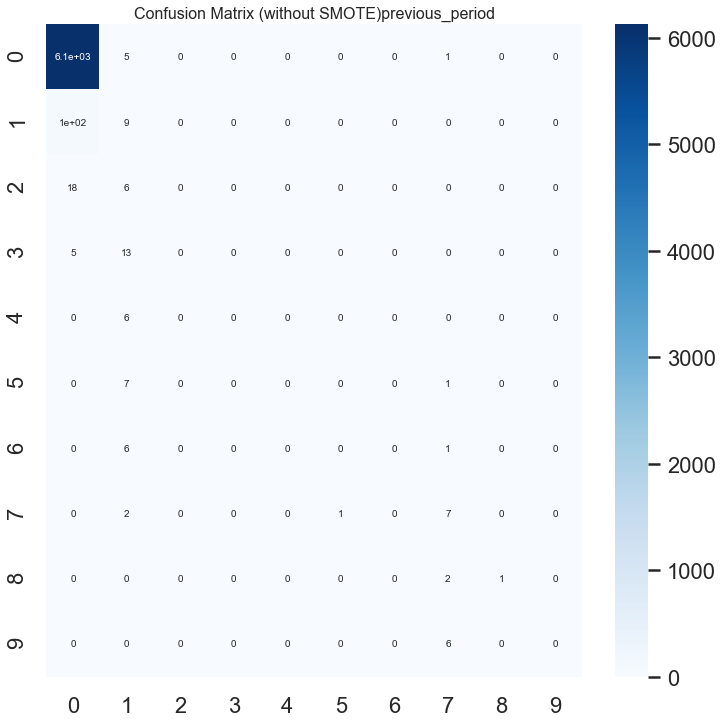

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

X = (df.drop('Target_Performance_Variable', axis=1))

y = df['Target_Performance_Variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
# Train
model = LogisticRegression(random_state=42, multi_class='ovr', penalty='none', solver='newton-cg')
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
#print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 10})
plt.title('Confusion Matrix (without SMOTE)' + feature, size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [34]:
from imblearn.over_sampling import SMOTE 

X = (df.drop('Target_Performance_Variable', axis=1))

y = df['Target_Performance_Variable']

sm = SMOTE(random_state=123)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (25305, 10)
Shape of X after SMOTE: (245570, 10)

Balance of positive and negative classes (%):


8.0     10.0
7.0     10.0
9.0     10.0
10.0    10.0
4.0     10.0
3.0     10.0
1.0     10.0
2.0     10.0
5.0     10.0
6.0     10.0
Name: Target_Performance_Variable, dtype: float64

_________
                               coef
Occupancy_Status_S     3.232558e+01
Original_UPB           1.424328e+01
HPA_adjusted_LTV       1.138421e+01
Number_of_Units        9.718610e+00
Loan_Age               4.704717e+00
Original_DTI           3.997479e+00
Occupancy_Status_P     1.730399e+00
Modification_Flag_Y    1.178782e-01
Current_Interest_Rate  3.837005e-02
previous_period        1.489580e-38
_________


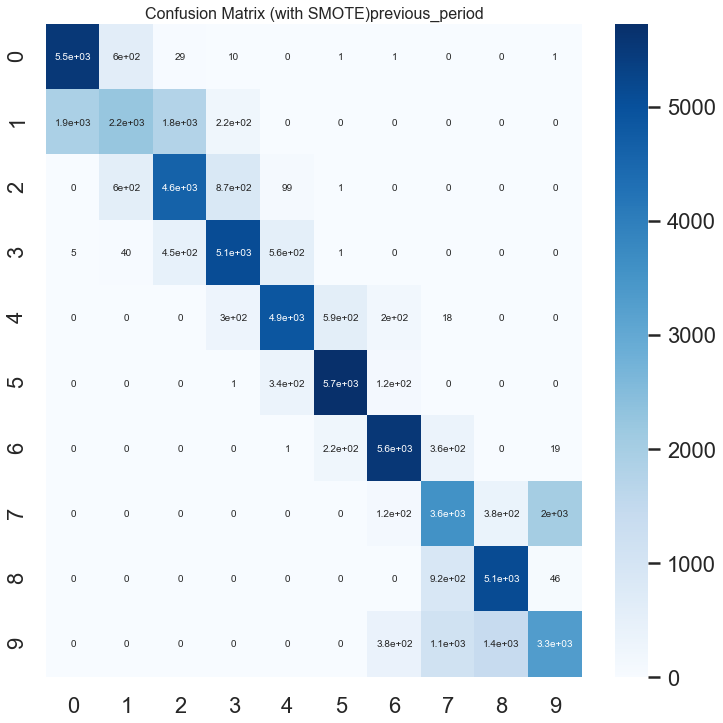

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

X = (df.drop('Target_Performance_Variable', axis=1))

y = df['Target_Performance_Variable']

sm = SMOTE(random_state=123)

X_sm, y_sm = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.25, random_state=123)
# Train
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
#print(f'Accuracy = {accuracy_score(y_test, preds):.6f}\nRecall = {recall_score(y_test, preds):.6f}\n')
print ('_________')
    
odds = np.exp(model.coef_[0])
print(pd.DataFrame(odds, 
            X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False))
print ('_________')
    
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 12))
plt.rcParams.update({'font.size': 10})
plt.title('Confusion Matrix (with SMOTE)' + feature, size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [53]:
import statsmodels.api as sm

In [54]:
X = (df.drop('Target_Performance_Variable', axis=1))

y = df['Target_Performance_Variable']

smote = SMOTE(random_state=123)

X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.25, random_state=123)

In [55]:
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit()
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: nan
         Iterations 14
                               MNLogit Regression Results                              
Dep. Variable:     Target_Performance_Variable   No. Observations:               184177
Model:                                 MNLogit   Df Residuals:                   184078
Method:                                    MLE   Df Model:                           90
Date:                         Sat, 08 May 2021   Pseudo R-squ.:                     nan
Time:                                 00:33:21   Log-Likelihood:                    nan
converged:                                True   LL-Null:                   -4.2408e+05
Covariance Type:                     nonrobust   LLR p-value:                       nan
 Target_Performance_Variable=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
